In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [57]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')
df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')
df_bitcoin = pd.read_csv('Bitcoin Search Trend.csv')
df_bitcoin_price = pd.read_csv('Daily Bitcoin Price.csv')

In [8]:
df_tesla.head()
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [9]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [18]:
df_bitcoin.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [23]:
df_bitcoin_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


***whats is the shape ?***


In [11]:
df_unemployment.shape

(181, 3)

In [12]:
df_tesla.shape

(124, 3)

In [19]:
df_unemployment.shape

(181, 3)

In [24]:
df_bitcoin_price.shape

(2204, 3)

In [13]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [14]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [21]:
df_bitcoin.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [25]:
df_bitcoin_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [38]:
df_tesla.isna().sum()

MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

In [34]:
df_unemployment.isna().sum()

MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

In [56]:
df_bitcoin.isna().sum()


MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64

In [58]:
df_bitcoin_price.isna().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [63]:
df_bitcoin_price.dropna(inplace=True)

***convertion datatype***

In [92]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_bitcoin.MONTH = pd.to_datetime(df_bitcoin.MONTH)
df_bitcoin_price.DATE = pd.to_datetime(df_bitcoin_price.DATE)


In [106]:
df_bitcoin_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [105]:
df_bitcoin.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [107]:
df_bitcoin_price_monthly = df_bitcoin_price.resample('M', on='DATE').last()

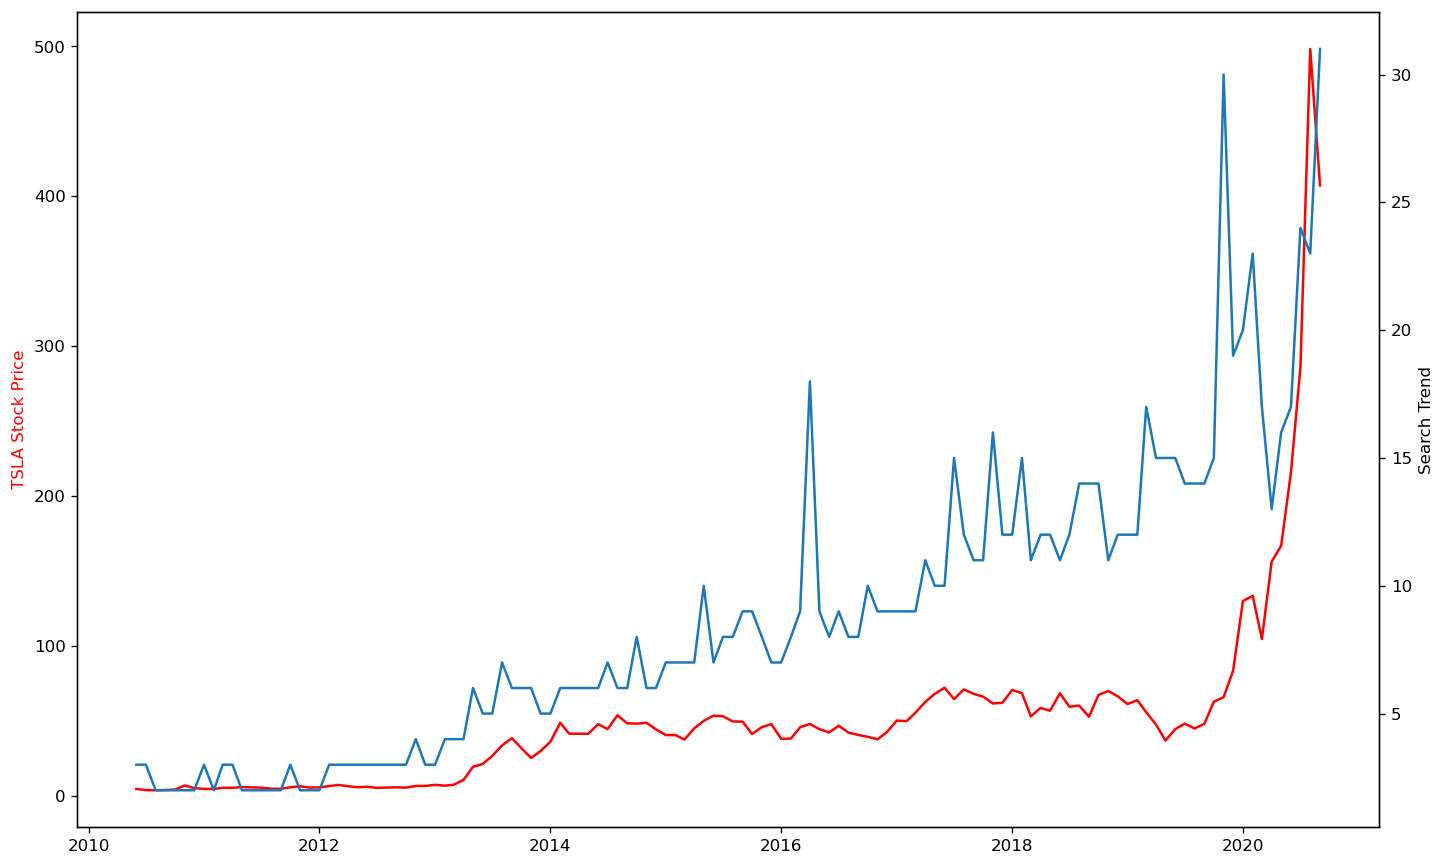

In [135]:
    plt.figure(figsize = (14,9), dpi=120)
    ax1 = plt.gca() # get current axis
    ax2 = ax1.twinx()
     
    ax1.set_ylabel('TSLA Stock Price', color = 'red')
    ax2.set_ylabel('Search Trend')
     
    
    ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color = 'red')
    ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)




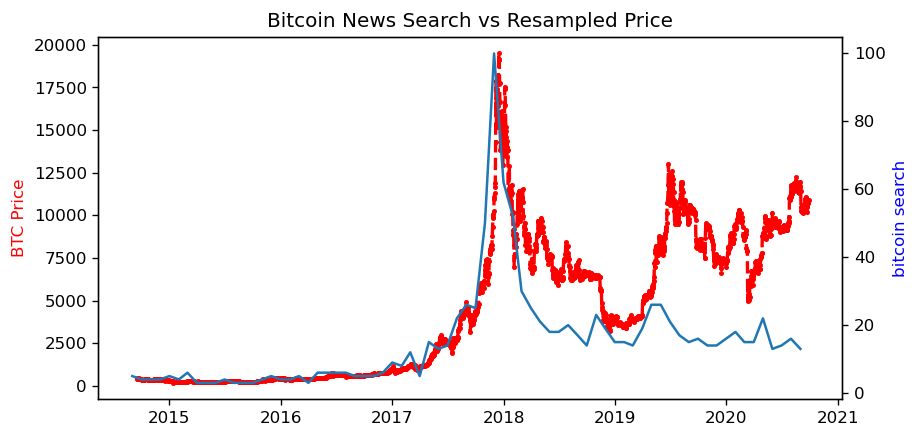

In [179]:
    plt.figure(figsize = (8,4), dpi=120)
    ax1 = plt.gca() # get current axis
    ax2 = ax1.twinx()
     
    ax1.set_ylabel('BTC Price', color = 'red')
    ax2.set_ylabel('bitcoin search', color = 'BLUE')
    
    plt.title('Bitcoin News Search vs Resampled Price')
    
    
    ax1.plot(df_bitcoin_price.DATE, df_bitcoin_price.CLOSE, color = 'red', marker='o',markersize=2,linestyle='dashed',linewidth=2)
    ax2.plot(df_bitcoin.MONTH, df_bitcoin.BTC_NEWS_SEARCH)


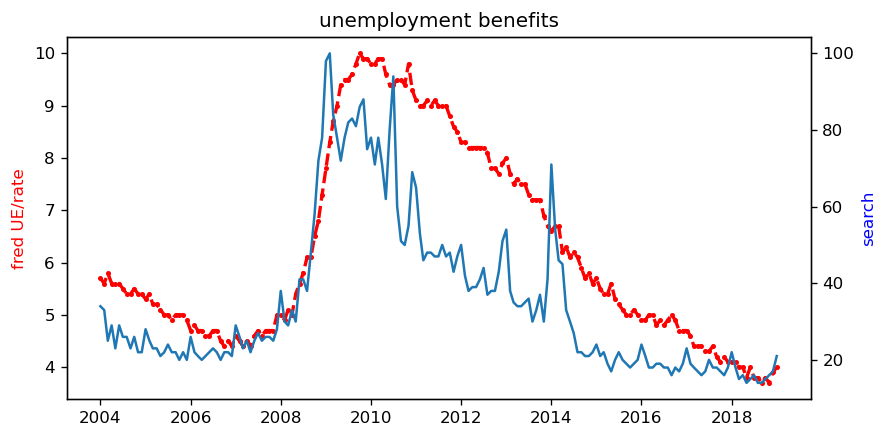

In [184]:
    plt.figure(figsize = (8,4), dpi=120)
    ax1 = plt.gca() # get current axis
    ax2 = ax1.twinx()
     
    ax1.set_ylabel('fred UE/rate', color = 'red')
    ax2.set_ylabel('search', color = 'BLUE')
    
    plt.title('unemployment benefits')
    
    
    ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color = 'red', marker='o',markersize=2,linestyle='dashed',linewidth=2)
    ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH)


In [183]:
df_unemployment_6montg_average = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

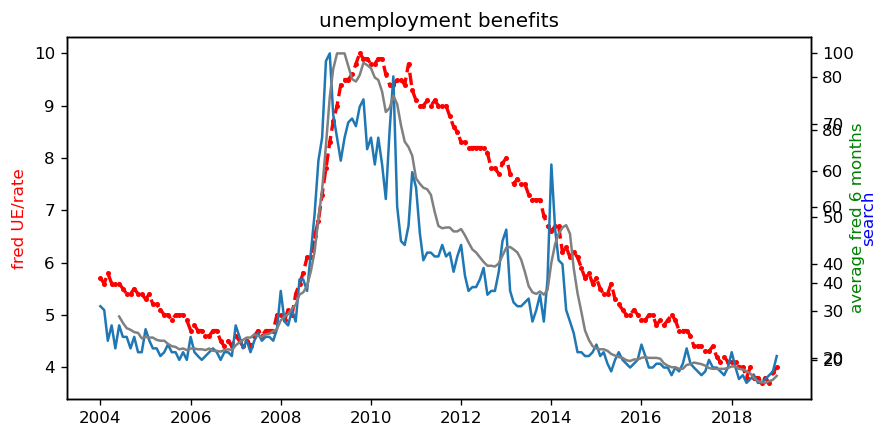

In [199]:
    plt.figure(figsize = (8,4), dpi=120)
    ax1 = plt.gca() # get current axis
    ax2 = ax1.twinx()
    ax3 = ax1.twinx() 
    
    ax1.set_ylabel('fred UE/rate', color = 'red')
    ax2.set_ylabel('search', color = 'BLUE')
    ax3.set_ylabel('average fred 6 months', color = 'green')
    
    plt.title('unemployment benefits')
    
    
    ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color = 'red', marker='o',markersize=2,linestyle='dashed',linewidth=2)
    ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH)
    ax3.plot(df_unemployment.MONTH,df_unemployment_6montg_average.UE_BENEFITS_WEB_SEARCH, color='grey' )

In [200]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [204]:
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

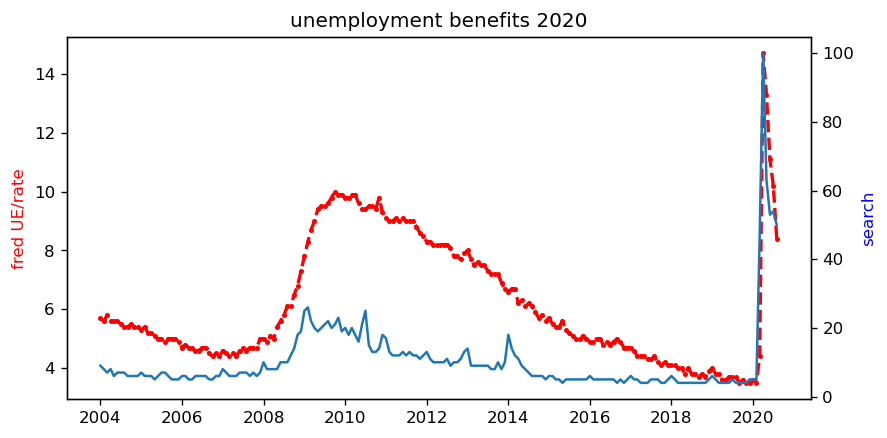

In [207]:
    plt.figure(figsize = (8,4), dpi=120)
    ax1 = plt.gca() # get current axis
    ax2 = ax1.twinx()
     
    ax1.set_ylabel('fred UE/rate', color = 'red')
    ax2.set_ylabel('search', color = 'BLUE')
    
    plt.title('unemployment benefits 2020')
    
    
    ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, color = 'red', marker='o',markersize=2,linestyle='dashed',linewidth=2)
    ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH)
